In [2]:
# importing libraries
import os
import numpy as np 
import pandas as pd
import scipy.io
import warnings
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from scipy import signal
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
#from kaggle_datasets import KaggleDatasets

warnings.filterwarnings('ignore')
#os.listdir('/kaggle/input/BloodPressureDataset')
os.listdir(r"C:\Users\Puspamita\Desktop\EMBEDDED PROJECT PPG\PPG DATA SET WITH BP FROM KAGGLE")

['part_1.mat',
 'part_10.mat',
 'part_11.mat',
 'part_12.mat',
 'part_2.mat',
 'part_3.mat',
 'part_4.mat',
 'part_5.mat',
 'part_6.mat',
 'part_7.mat',
 'part_8.mat',
 'part_9.mat',
 'Samples']

In [ ]:
import tensorflow as tf
import numpy as np
import scipy.io

# Creating a config file/dictionary with some variables.
config = {
    'seed': 77,
    'sample_size': 125,
    'train_size': 3000000,  # train on 3 million data points
    'train_params': {
        'batch_size': 128,
        'epochs': 100,
        'learn_rate': 1e-3,
    }
}

# Check if GPU is available, otherwise fall back to CPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Set memory growth to avoid TensorFlow using all GPU memory
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        strategy = tf.distribute.MirroredStrategy()  # Use GPU strategy
        print('Running on GPU(s)')
    except RuntimeError as e:
        print(e)
else:
    print('GPU not found. Using CPU.')
    strategy = tf.distribute.get_strategy()  # Default strategy for CPU

# Instantiate distribution strategy
replicas = strategy.num_replicas_in_sync
batch_size = config['train_params']['batch_size'] * replicas
print(f'Number of Replicas: {replicas}')

# Set seed for reproducibility
def SetSeed(seed=None):
    """Set seed for reproducibility."""
    tf.random.set_seed(seed)
    np.random.seed(seed)

SetSeed(seed=config['seed'])

# Load a sample .mat file to understand the data dimensions
test_sample = scipy.io.loadmat(r"C:\Users\Puspamita\Desktop\EMBEDDED PROJECT PPG\PPG DATA SET WITH BP FROM KAGGLE\part_1.mat")['p']
print(f'test_sample Data type: {type(test_sample)}')
print(f'test_sample shape/dimensions: {test_sample.shape}')

print(f"Total Samples: {len(test_sample[0])}")
print(f"Number of readings in each sample(column): {len(test_sample[0][0])}")
print(f"Number of samples in each reading(ECG): {len(test_sample[0][0][2])}")

temp_mat = test_sample[0, 999]
temp_length = temp_mat.shape[1]
sample_size = config['sample_size']

print(temp_length)
print((int)(temp_length/sample_size))


GPU not found. Using CPU.
Number of Replicas: 1
test_sample Data type: <class 'numpy.ndarray'>
test_sample shape/dimensions: (1, 1000)
Total Samples: 1000
Number of readings in each sample(column): 3
Number of samples in each reading(ECG): 61000
9000
72


In [ ]:
'''# Creating a config file/dictionary some variables.

config = {
    'seed': 77,
    'sample_size': 125,
    'train_size': 3000000, # train on 3 million data points
    'train_params':{
        'batch_size':128,
        'epochs': 10,
        'learn_rate': 1e-3,
    }
}

# Initializing TPU
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)

# Instantiate distribution strategy
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
    
auto = tf.data.experimental.AUTOTUNE
replicas = tpu_strategy.num_replicas_in_sync
Batch_size = config['train_params']['batch_size'] * replicas
print(f'Number of Replicas: {replicas}')

def SetSeed(seed=None):
    """Set seed for reproducibility."""
    tf.random.set_seed(seed)
    np.random.seed(seed)
    
SetSeed(seed=config['seed'])

# Getting dataset from GCS
# since TPUs stream data from GCS
#gcs_dataset_path = KaggleDatasets().get_gcs_path('BloodPressureDataset')
#train_files = tf.io.gfile.glob(os.path.join(gcs_dataset_path, '*.mat'))
#train_files 

# Loading a sample .mat file to understand the data dimensions
test_sample = scipy.io.loadmat(f'../input/BloodPressureDataset/part_{1}.mat')['p']
print(f'test_sample Data type: {type(test_sample)}')
print(f'test_sample shape/dimensions: {test_sample.shape}')

print(f"Total Samples: {len(test_sample[0])}")
print(f"Number of readings in each sample(column): {len(test_sample[0][0])}")
print(f"Number of samples in each reading(ECG): {len(test_sample[0][0][2])}")

temp_mat = test_sample[0, 999]
temp_length = temp_mat.shape[1]
sample_size = config['sample_size']


print(temp_length)
print((int)(temp_length/sample_size))'''

PPG_shape: (32061000, 1)
 ECG_shape: (32061000, 1)
 BP_shape: (32061000, 1)


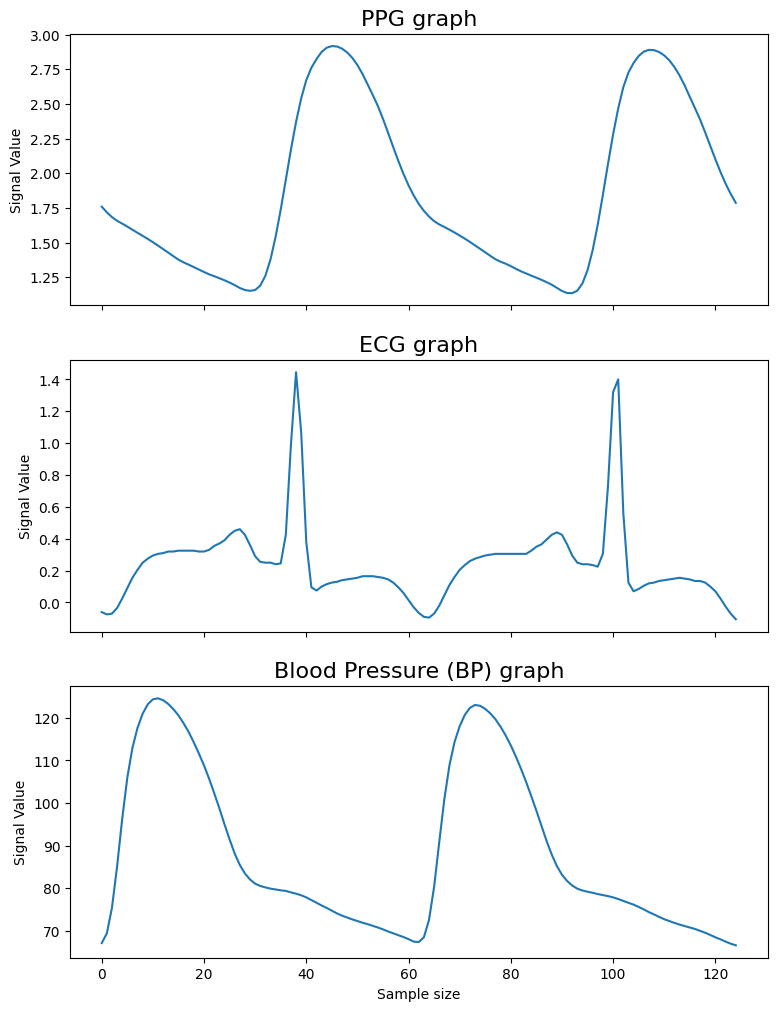

In [4]:
# Extracting signal data
ppg = []
bp = []
ecg = []

for i in range(1000):
    temp_mat = test_sample[0, i]
    temp_length = temp_mat.shape[1]
    for j in range((int)(temp_length/sample_size)):
        temp_ppg = temp_mat[0, j*sample_size:(j+1)*sample_size]
        temp_ecg = temp_mat[2, j*sample_size:(j+1)*sample_size]
        temp_bp = temp_mat[1, j*sample_size:(j+1)*sample_size]
        ppg.append(temp_ppg)
        ecg.append(temp_ecg)
        bp.append(temp_bp)



# Reshaping the ecg, ppg and bp signal data into column vectors
ppg, ecg, bp = np.array(ppg).reshape(-1,1), np.array(ecg).reshape(-1,1), np.array(bp).reshape(-1,1)
print(f'PPG_shape: {ppg.shape}\n ECG_shape: {ecg.shape}\n BP_shape: {bp.shape}')


##plotting sample ppg, ecg and bp signals
##using a sample size of 125
fig, ax = plt.subplots(3,1, figsize=(9,12), sharex=True)

ax[0].set_title('PPG graph', fontsize=16)
ax[0].set_ylabel('Signal Value')
ax[0].plot(ppg[:125])

ax[1].set_title('ECG graph', fontsize=16)
ax[1].set_ylabel('Signal Value')
ax[1].plot(ecg[:125])

ax[2].set_title('Blood Pressure (BP) graph', fontsize=16)
ax[2].set_ylabel('Signal Value')
ax[2].set_xlabel('Sample size')
ax[2].plot(bp[:125])




GPU not found. Using CPU.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 559,745 (2.14 MB)

 Trainable params: 559,745 (2.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 212s 9ms/step - loss: 30.8064 - root_mean_squared_error: 40.3796
Epoch 2/10
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 195s 8ms/step - loss: 22.1329 - root_mean_squared_error: 28.7197
Epoch 3/10
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 93s 4ms/step - loss: 21.2884 - root_mean_squared_error: 27.9524
Epoch 4/10
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 200s 9ms/step - loss: 21.0012 - root_mean_squared_error: 27.7082
Epoch 5/10
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 213s 9ms/step - loss: 20.8688 - root_mean_squared_error: 27.5756
Epoch 6/10
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 163s 7ms/step - loss: 20.7772 - root_mean_squared_error: 27.4847
Epoch 7/10
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 91s 4ms/step - loss: 20.7054 - root_mean_squared_error: 27.4107
Epoch 8/10
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 91s 4ms/step - loss: 20.6505 - root_mean_squared_error: 27.3675
Epoch 9/10
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 92s 4ms/step - loss: 20.5988 - root_mean_squared_error: 27.3060
Epoch 10/10
23438/23438

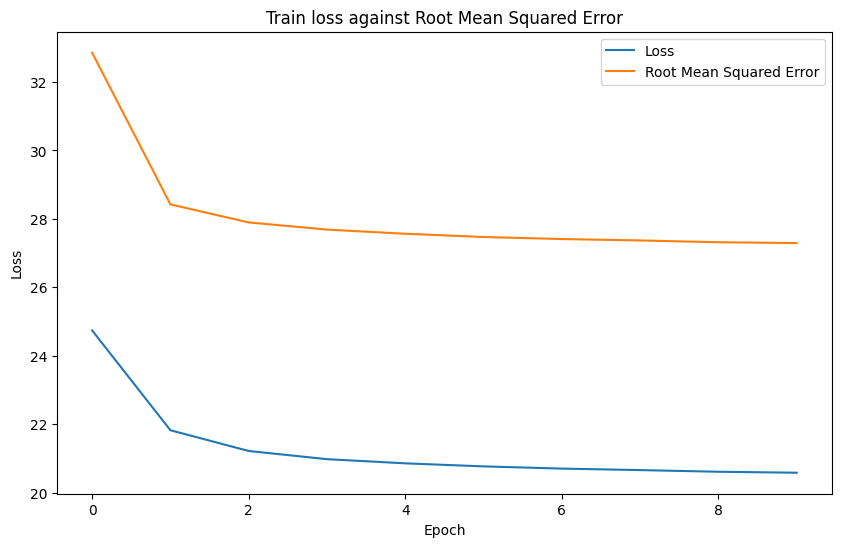

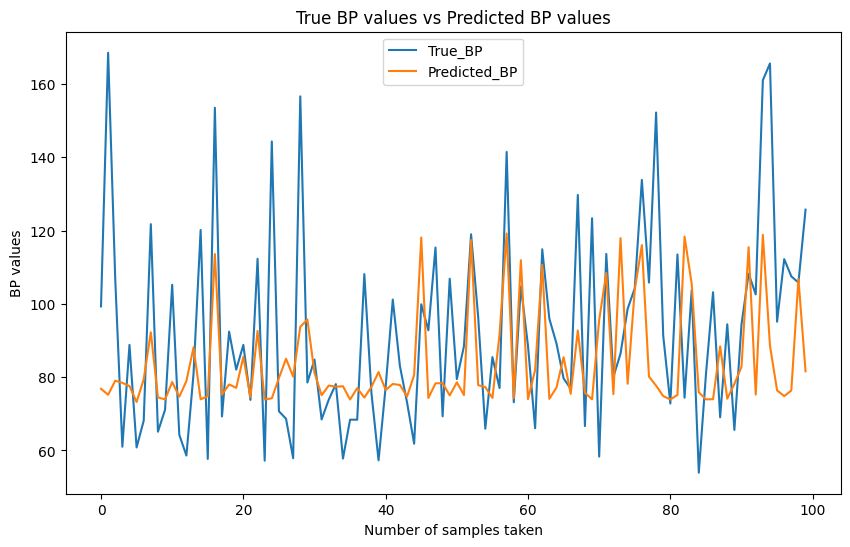

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers, Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(ppg, bp, test_size=0.30)

# GPU/CPU Strategy
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Set memory growth to avoid using all GPU memory
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        strategy = tf.distribute.MirroredStrategy()  # Use GPU strategy if available
        print('Running on GPU(s)')
    except RuntimeError as e:
        print(e)
else:
    print('GPU not found. Using CPU.')
    strategy = tf.distribute.get_strategy()  # Default strategy for CPU

# Baseline Sequential Model
def Model(input_dim, num_class):
    model = Sequential()

    model.add(layers.Dense(1024, input_dim=input_dim, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout layer to avoid overfitting

    model.add(layers.Dense(512, activation='relu')) 
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(64, activation='relu'))    
    model.add(layers.Dropout(0.25))

    model.add(layers.Dense(num_class, activation='linear'))  # Output layer for regression
    
    return model

# Input dimension and number of output classes
Input_dim = X_train.shape[1]
Classes = 1

# Creating and compiling the model under the strategy scope (GPU/CPU)
with strategy.scope():
    model = Model(input_dim=Input_dim, num_class=Classes)
    model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                  optimizer=optimizers.SGD(learning_rate=config['train_params']['learn_rate']),
                  metrics=[tf.keras.metrics.RootMeanSquaredError()]
                 )
model.summary()

# Training the model
history = model.fit(X_train[:config['train_size']],  # using the first 3 million rows
                    y_train[:config['train_size']].squeeze(),
                    epochs=config['train_params']['epochs'],
                    batch_size=batch_size,
                    verbose=1
                   )

# Predicting on the test set using the model
nn_predictions = model.predict(X_test[:config['train_size']])

# Calculate Root Mean Squared Error
rmse = tf.keras.metrics.RootMeanSquaredError()
rmse.update_state(y_test[:config['train_size']], nn_predictions)
print(f'Model RMSE: {rmse.result().numpy()}')

# Plot training loss and RMSE
plt.figure(figsize=(10, 6))
plt.title('Train loss against Root Mean Squared Error')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['root_mean_squared_error'])
plt.legend(['Loss', 'Root Mean Squared Error'])
plt.show()

# Visualize predicted BP and the true BP
plt.figure(figsize=(10, 6))
plt.title("True BP values vs Predicted BP values")
plt.xlabel('Number of samples taken')
plt.ylabel('BP values')
plt.plot(y_test[:100])  # Plot only the first 100 samples
plt.plot(nn_predictions[:100])
plt.legend(['True_BP', 'Predicted_BP'])
plt.show()


GPU not found. Using CPU.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 559,745 (2.14 MB)

 Trainable params: 559,745 (2.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 247s 10ms/step - loss: 29.6492 - root_mean_squared_error: 38.9564
Epoch 2/10
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 286s 12ms/step - loss: 21.7175 - root_mean_squared_error: 28.2219
Epoch 3/10
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 259s 9ms/step - loss: 20.9253 - root_mean_squared_error: 27.5562
Epoch 4/10
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 90s 4ms/step - loss: 20.7030 - root_mean_squared_error: 27.3808
Epoch 5/10
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 90s 4ms/step - loss: 20.5812 - root_mean_squared_error: 27.2594
Epoch 6/10
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 92s 4ms/step - loss: 20.4811 - root_mean_squared_error: 27.1601
Epoch 7/10
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 93s 4ms/step - loss: 20.4213 - root_mean_squared_error: 27.0903
Epoch 8/10
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 99s 4ms/step - loss: 20.3741 - root_mean_squared_error: 27.0547
Epoch 9/10
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 97s 4ms/step - loss: 20.3395 - root_mean_squared_error: 27.0021
Epoch 10/10
23438/23438

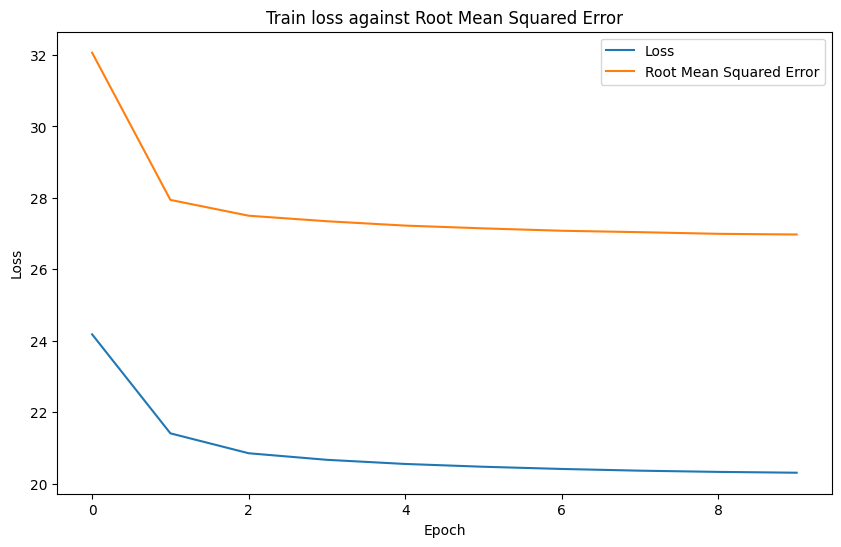

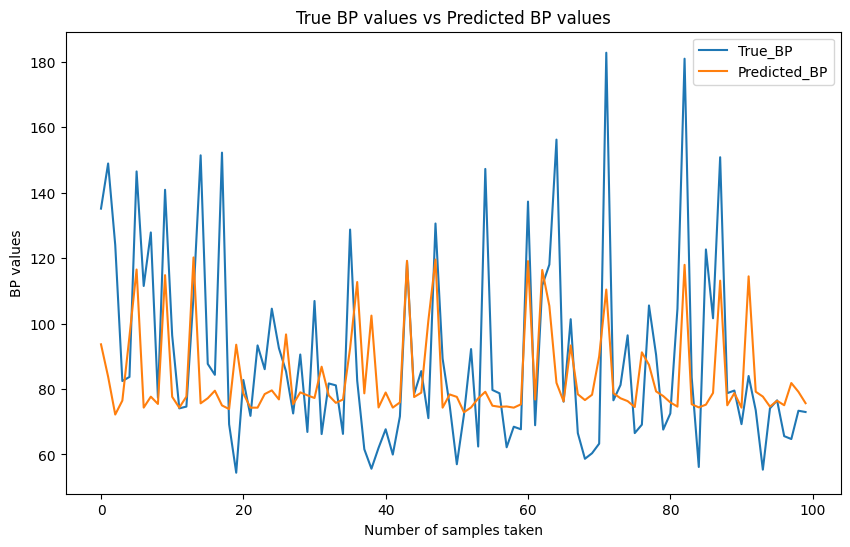

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers, Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(ppg, bp, test_size=0.30)

# GPU/CPU Strategy
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Set memory growth to avoid using all GPU memory
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        strategy = tf.distribute.MirroredStrategy()  # Use GPU strategy if available
        print('Running on GPU(s)')
    except RuntimeError as e:
        print(e)
else:
    print('GPU not found. Using CPU.')
    strategy = tf.distribute.get_strategy()  # Default strategy for CPU

# Baseline Sequential Model
def Model(input_dim, num_class):
    model = Sequential()

    model.add(layers.Dense(1024, input_dim=input_dim, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout layer to avoid overfitting

    model.add(layers.Dense(512, activation='relu')) 
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(64, activation='relu'))    
    model.add(layers.Dropout(0.25))

    model.add(layers.Dense(num_class, activation='linear'))  # Output layer for regression
    
    return model

# Input dimension and number of output classes
Input_dim = X_train.shape[1]
Classes = 1

# Creating and compiling the model under the strategy scope (GPU/CPU)
with strategy.scope():
    model = Model(input_dim=Input_dim, num_class=Classes)
    model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                  optimizer=optimizers.SGD(learning_rate=config['train_params']['learn_rate']),
                  metrics=[tf.keras.metrics.RootMeanSquaredError()]
                 )
model.summary()

# Training the model
history = model.fit(X_train[:config['train_size']],  # using the first 3 million rows
                    y_train[:config['train_size']].squeeze(),
                    epochs=config['train_params']['epochs'],
                    batch_size=batch_size,
                    verbose=1
                   )

# Predicting on the test set using the model
nn_predictions = model.predict(X_test[:config['train_size']])

# Convert the predictions and true values back from tensor format if needed
y_true = y_test[:config['train_size']]
y_pred = nn_predictions

# Statistical accuracy measures
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² (Coefficient of Determination): {r2}')

# Calculate Root Mean Squared Error using TensorFlow
rmse_metric = tf.keras.metrics.RootMeanSquaredError()
rmse_metric.update_state(y_true, y_pred)
print(f'Model RMSE (TensorFlow): {rmse_metric.result().numpy()}')

# Plot training loss and RMSE
plt.figure(figsize=(10, 6))
plt.title('Train loss against Root Mean Squared Error')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['root_mean_squared_error'])
plt.legend(['Loss', 'Root Mean Squared Error'])
plt.show()

# Visualize predicted BP and the true BP
plt.figure(figsize=(10, 6))
plt.title("True BP values vs Predicted BP values")
plt.xlabel('Number of samples taken')
plt.ylabel('BP values')
plt.plot(y_true[:100])  # Plot only the first 100 samples
plt.plot(y_pred[:100])
plt.legend(['True_BP', 'Predicted_BP'])
plt.show()


In [10]:
'''# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(ppg, bp, test_size=0.30)

#Baseline Sequential Model
def Model(input_dim, num_class):
    model = Sequential()

    model.add(layers.Dense(1024, input_dim = input_dim, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(512, 'relu')) 
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(64, 'relu'))    
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(num_class, 'linear'))
    
    
    return model

Input_dim = X_train.shape[1]
Classes = 1

# Creating the model on TPU
with tpu_strategy.scope():
    model = Model(input_dim=Input_dim, num_class=Classes)
    model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                  optimizer=optimizers.SGD(lr=config['train_params']['learn_rate']),
                  metrics=[tf.keras.metrics.RootMeanSquaredError()]
                 )
model.summary()

# Training the model
history = model.fit(X_train[:config['train_size']], # using the first 3 million rows.
                    y_train[:config['train_size']].squeeze(),
                    epochs=config['train_params']['epochs'],
                    batch_size=Batch_size,
                    verbose = 1
                   )

#Predicting on the test set using the nn(neural network) model
nn_predictions = model.predict(X_test[:config['train_size']])

rmse = tf.keras.metrics.RootMeanSquaredError()
rmse.update_state(y_test[:config['train_size']], nn_predictions)
print(f'Model RMSE: {rmse.result().numpy()}')

plt.title('Train loss against Root_Mean_Squared_error')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['root_mean_squared_error'])
plt.legend(['Loss', 'Root_Mean_Squared_error'])

# Visualize predicted BP and the True BP
plt.title("===True BP values Vs Predicted BP values===")
plt.xlabel('Number of samples taken')
plt.ylabel('BP values')
plt.plot(y_test[:100]) #only plotting 100 samples
plt.plot(nn_predictions[:100])
plt.legend(['True_BP', 'Predicted_BP'])'''

NameError: name 'tpu_strategy' is not defined